In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

AttributeError: 'numpy.int64' object has no attribute 'startswith'

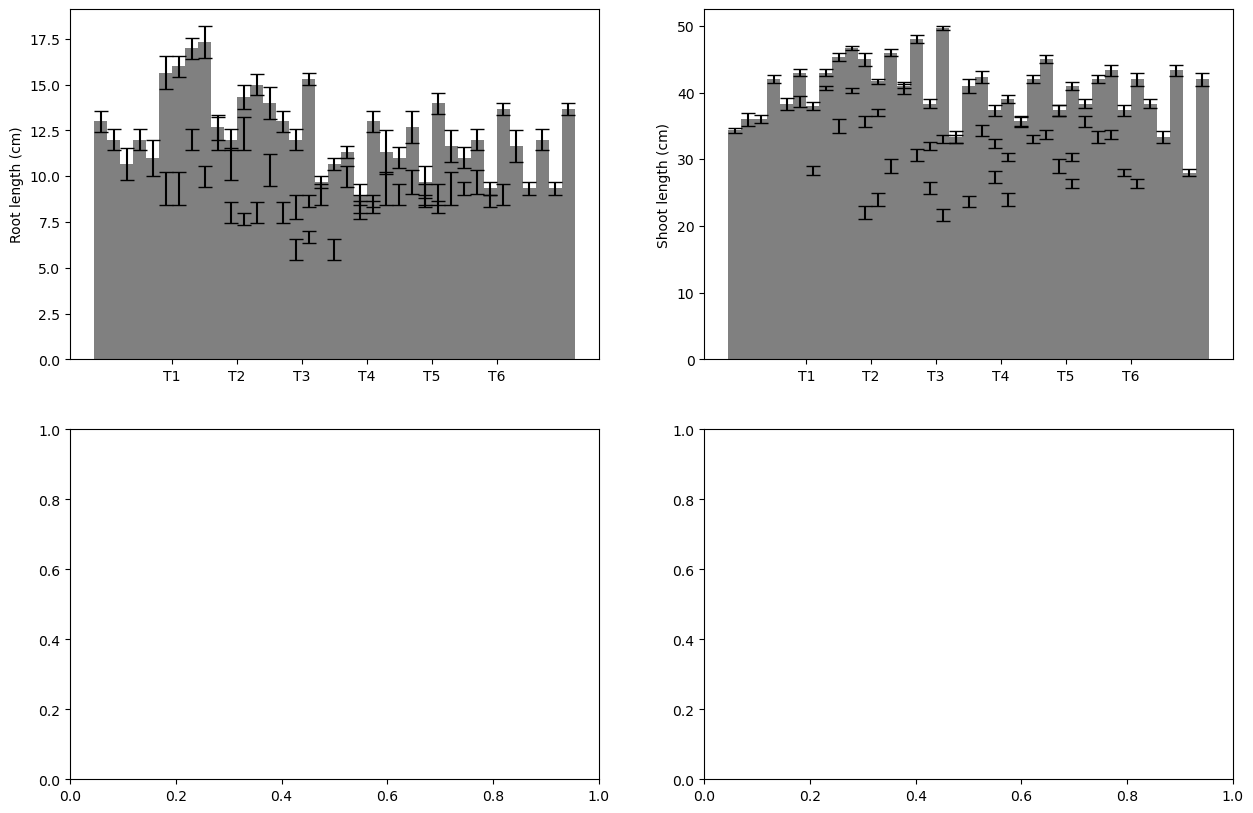

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel('./Extracted_for Python_3rd_paper.xlsx')

# Extract the categorical columns and the data columns
categories = df.iloc[:, :2]  # First two columns are 'variety' and 'treatment'
data = df.iloc[:, 2:]  # Remaining columns are variables and their standard errors

# Define colors for treatments using a seaborn color palette
palette = sns.color_palette("husl", 6)  # Using the 'husl' palette with 6 colors
treatment_colors = {
    'T1': palette[0],
    'T2': palette[1],
    'T3': palette[2],
    'T4': palette[3],
    'T5': palette[4],
    'T6': palette[5]
}

# Default color for unspecified treatments
default_color = 'gray'

# Group columns for plotting
groups = [
    data.columns[:4],  # First 4 columns (2 variables and their errors)
    data.columns[4:12],  # Next 8 columns (4 variables and their errors)
    data.columns[12:]  # Last 4 columns (2 variables and their errors)
]

# Define the number of rows and columns for each group of subplots
subplot_layouts = [(2, 2), (4, 2), (2, 2)]

for group, (nrows, ncols) in zip(groups, subplot_layouts):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration
    
    for ax, i in zip(axes, range(0, len(group), 2)):
        variable = group[i]
        error = group[i + 1]
        
        means = data[variable]
        errors = data[error]
        
        # Create a DataFrame for plotting
        plot_data = pd.DataFrame({
            'variety': categories['variety'],
            'treatment': categories['treatment'],
            'means': means,
            'errors': errors
        })
        
        # Get unique varieties and treatments
        unique_varieties = plot_data['variety'].unique()
        unique_treatments = plot_data['treatment'].unique()
        
        # Set bar width and positions
        bar_width = 0.2
        x = np.arange(len(unique_treatments))
        
        # Plot bars with colors based on varieties
        for j, variety in enumerate(unique_varieties):
            variety_data = plot_data[plot_data['variety'] == variety]
            positions = x + j * bar_width
            ax.bar(positions, variety_data['means'], yerr=variety_data['errors'], capsize=5, 
                   color=treatment_colors.get(variety, default_color), width=bar_width, label=variety)
        
        # Set x-ticks to the middle of the grouped bars
        ax.set_xticks(x + bar_width * (len(unique_varieties) - 1) / 2)
        ax.set_xticklabels(unique_treatments, rotation=0)  # Set rotation to 0 for horizontal labels
        
        # Set y-axis label as the variable name
        ax.set_ylabel(variable)
    
    # Add legend above the plot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='Variety', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(unique_varieties))
    
    # Adjust layout to fit all elements
    plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)
    
    # Save the figure with 300 DPI resolution
    # plt.savefig(f'./{group[0]}_to_{group[-1]}.png', dpi=300)
    
    plt.show()

In [17]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Load the Excel file
df = pd.read_excel('./Extracted_for Python_3rd_paper.xlsx')

# Extract the categorical columns and the data columns
categories = df.iloc[:, :2]  # First two columns are 'variety' and 'treatment'
data = df.iloc[:, 2:]  # Remaining columns are variables and their standard errors

# Define colors for treatments using a seaborn color palette
palette = sns.color_palette("husl", 6)  # Using the 'husl' palette with 6 colors
treatment_colors = {
    'T1': palette[0],
    'T2': palette[1],
    'T3': palette[2],
    'T4': palette[3],
    'T5': palette[4],
    'T6': palette[5]
}

# Default color for unspecified treatments
default_color = 'gray'

# Create a list to store individual plots
plots = []

# Create individual plots
for i in range(0, data.shape[1], 2):
    variable = data.columns[i]
    error = data.columns[i + 1]
    
    means = data[variable]
    errors = data[error]
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'variety': categories['variety'].astype(str),  # Ensure variety is a string
        'treatment': categories['treatment'],
        'means': means,
        'errors': errors
    })
    
    # Get unique varieties and treatments
    unique_varieties = plot_data['variety'].unique()
    unique_treatments = plot_data['treatment'].unique()
    
    # Create a bar plot for each variety
    fig = go.Figure()
    for variety in unique_varieties:
        variety_data = plot_data[plot_data['variety'] == variety]
        fig.add_trace(go.Bar(
            x=variety_data['treatment'],
            y=variety_data['means'],
            error_y=dict(type='data', array=variety_data['errors']),
            name=str(variety),  # Ensure name is a string
            marker_color=treatment_colors.get(variety_data['treatment'].iloc[0], default_color)
        ))
    
    # Update layout
    fig.update_layout(
        title=variable,
        xaxis_title='Treatment',
        yaxis_title=variable,
        barmode='group'
    )
    
    # Append the plot to the list
    plots.append(fig)

# Define the number of rows and columns for each group of subplots
subplot_layouts = [(2, 3), (4, 2), (2, 2)]

# Group the plots into figures with subplots
plot_groups = [plots[:4], plots[4:12], plots[12:]]

for group, (nrows, ncols) in zip(plot_groups, subplot_layouts):
    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=[plot.layout.title.text for plot in group])
    
    for idx, plot in enumerate(group):
        row = idx // ncols + 1
        col = idx % ncols + 1
        for trace in plot.data:
            fig.add_trace(trace, row=row, col=col)
    
    # Update layout
    fig.update_layout(
        height=600 * nrows,  # Adjust height based on the number of rows
        width=800,  # Adjust width as needed
        title_text="Grouped Plots"
    )
    
    # Show the figure
    fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (754250214.py, line 74)